In [2]:
import numpy as np
import pandas as pd
import random as rd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

from DatasetLogReturn import StockDatasetLogReturn

In [3]:
configs = {
    # "batch_size" : 128,
    # "max_file_count" : 2179,
    "train_file" : 30, # 12,
    "validation_file" : 0, # 7,
    "test_file" : 10, # 7,
    "input_size" : 1,
    "output_size" : 1,
    # "init_learning_rate" : 1e-2,
    # "scheduler_factor": 0.2,
    # "scheduler_patience": 2,
    # "scheduler_min_lr": 1e-4,
    # "epoch" : 150
}

configs["file_count"] = configs["train_file"] + configs["validation_file"] + configs["test_file"]

print("File count:", configs["file_count"])

File count: 40


In [4]:
tickers = list(map(str.strip,open("tickers.txt","r").readlines()))
removes = ["SEE", "ELA", "VHI"]
tickers = [ e for e in tickers if e not in removes]

# ./data/SEE.csv negative found: 2315
# ./data/ELA.csv negative found: 5915
# ./data/VHI.csv negative found: 5430

# ./data/CVM.csv very high found: 176
# ./data/OBLG.csv very high found: 19
# ./data/CEI.csv very high found: 3057

In [5]:
filenames = ["./data/" + x + ".csv" for x in tickers]
rd.shuffle(filenames)
filenames = filenames[:configs["file_count"]]

train_files, test_files = train_test_split(filenames, test_size=configs["test_file"]/configs["file_count"])

train_dataset = StockDatasetLogReturn(train_files, configs["input_size"], configs["output_size"])
train_dataset.Preprocess()

test_dataset = StockDatasetLogReturn(test_files, configs["input_size"], configs["output_size"])
test_dataset.Preprocess()

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/174225 [00:00<?, ?it/s]

d:\veeliw_offline\stock-machine-learning-project\DatasetLogReturn.py:48: RuntimeWarning: divide by zero encountered in log
  c = np.log(b)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/56460 [00:00<?, ?it/s]

d:\veeliw_offline\stock-machine-learning-project\DatasetLogReturn.py:48: RuntimeWarning: divide by zero encountered in log
  c = np.log(b)


In [6]:
print(len(filenames))
print(train_files)
print(test_files)

40
['./data/RCG.csv', './data/FF.csv', './data/MOGU.csv', './data/SBBA.csv', './data/HMC.csv', './data/CHMI.csv', './data/CTZ.csv', './data/SXT.csv', './data/AIF.csv', './data/IFF.csv', './data/OHI.csv', './data/BUI.csv', './data/MDC.csv', './data/MHK.csv', './data/UHT.csv', './data/TPX.csv', './data/OXY.csv', './data/RLJ.csv', './data/MG.csv', './data/PBY.csv', './data/GJR.csv', './data/TAL.csv', './data/WMT.csv', './data/PLOW.csv', './data/NVR.csv', './data/GNE.csv', './data/RMD.csv', './data/HASI.csv', './data/BGX.csv', './data/EPM.csv']
['./data/MEC.csv', './data/AEE.csv', './data/JQC.csv', './data/FND.csv', './data/NRT.csv', './data/EZT.csv', './data/PCM.csv', './data/RVP.csv', './data/IHT.csv', './data/VOYA.csv']


In [16]:
train_df = pd.concat([pd.read_csv(f"{filename}") for filename in train_files], ignore_index=True)
test_df = pd.concat([pd.read_csv(f"{filename}") for filename in test_files], ignore_index=True)

In [8]:
train_np_x = np.array([train_dataset[idx][0][1:] for idx in range(len(train_dataset))]).reshape(-1, 5)
train_np_y = np.array([train_dataset[idx][1][4] for idx in range(len(train_dataset))]).reshape(-1)
test_np_x = np.array([test_dataset[idx][0][1:] for idx in range(len(test_dataset))]).reshape(-1, 5)
test_np_y = np.array([test_dataset[idx][1][4] for idx in range(len(test_dataset))]).reshape(-1)

print(train_np_x)
print(train_np_y)

[[-7.5985894e-02 -4.7628067e-02  0.0000000e+00  0.0000000e+00
   6.7117202e-01]
 [-2.9802325e-07 -5.0010625e-02  1.3422719e-02  2.5975272e-02
  -1.2421945e-01]
 [ 6.3715689e-02  3.7740242e-02 -1.3423128e-02 -5.2643858e-02
  -1.6270614e-01]
 ...
 [ 1.9705016e-02  0.0000000e+00  1.6569468e-03 -4.8979465e-03
   9.0622771e-01]
 [ 0.0000000e+00  1.8466923e-02  6.6007199e-03  2.2654651e-02
   2.2474790e+00]
 [ 1.4528087e-02 -2.3894822e-03  1.6313516e-02  0.0000000e+00
   1.1084955e+00]]
[ 0.02597527 -0.05264386  0.         ...  0.02265465  0.
 -0.04919029]


In [20]:
train_np_small_x = train_np_x[::10]
train_np_small_y = train_np_y[::10]

In [27]:
regression_log = svm.SVR()
regression_log.fit(train_np_small_x, train_np_small_y)

SVR()

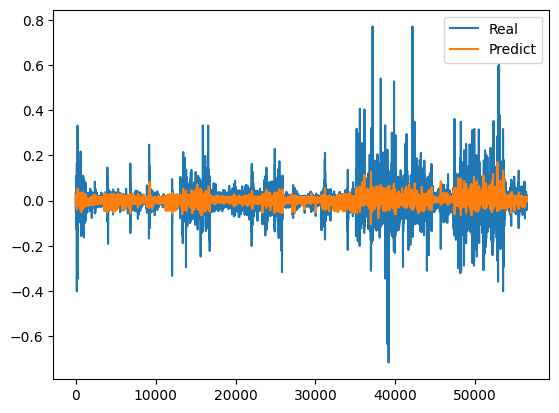

In [30]:
y_pred_log = regression_log.predict(test_np_x)
plt.plot(test_np_y, label="Real")
plt.plot(y_pred_log, label="Predict")

plt.legend()
plt.show()

In [17]:
select = ["Open", "High", "Low", "Close", "Volume"]
train_df_x = train_df[select][:-1]
train_df_y = train_df["Close"][1:]
test_df_x = test_df[select][:-1]
test_df_y = test_df["Close"][1:]

In [31]:
train_df_small_x = train_df_x[::10]
train_df_small_y = train_df_y[::10]

In [32]:
regression = svm.SVR()
regression.fit(train_df_small_x, train_df_small_y)

SVR()

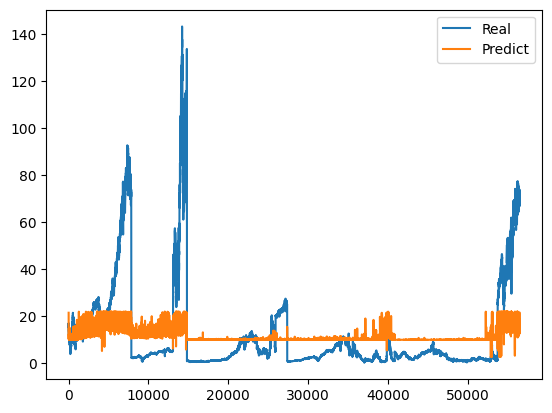

In [33]:
y_pred = regression.predict(test_df_x)
plt.plot(test_df_y, label="Real")
plt.plot(y_pred, label="Predict")

plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [37]:
mae = mean_absolute_error(y_true=test_np_y, y_pred=y_pred_log)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=test_np_y, y_pred=y_pred_log) #default=True
rmse = root_mean_squared_error(y_true=test_np_y, y_pred=y_pred_log)

print("Score:", regression_log.score(test_np_x, test_np_y))
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Score: -0.08624593444118411
MAE: 0.017653463768367756
MSE: 0.0009416866843557661
RMSE: 0.03068691389429322


In [38]:
mae = mean_absolute_error(y_true=test_df_y, y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=test_df_y, y_pred=y_pred) #default=True
rmse = root_mean_squared_error(y_true=test_df_y, y_pred=y_pred)

print("Score:", regression.score(test_df_x, test_df_y))
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Score: 0.1782092838666376
MAE: 11.041205670235602
MSE: 319.45513985645846
RMSE: 17.873308027795485


In [40]:
import joblib
joblib.dump(regression_log, "./models/SVM_log.sav")

['./models/SVM_log.sav']

In [41]:
joblib.dump(regression, "./models/SVM.sav")

['./models/SVM.sav']